BEER ME!

You have been hired by a home brewing store as their go to consultant to suggest new and innovative inputs on how they can increase recipe and equipment sales. Since the desires of the consumer is an ever changing process, more and more people are looking to experiment on their own with some of their favorite beer styles and flavors. Since home brewing stores are a bit of a niche market, it is up to you (me) to make sure they know what to have stocked on their shelf. This particular store is a bit outdated with what they keep on hand. The owner has been reluctant to change, as they believe beer doesn't need to get too extravagant with the style or taste. The partner owner thinks otherwise. They are asking you to utilize a data processing platform to come up with insight to the demand of the consumer. They also think a predictive ML function would be a great thing to utilize for the future of the business and the evolving beer demand. 

We should ask ourselves three questions...
    1. What styles do consumers prefer?
    2. Can we find out what metrics are more important than others when considering a recipe? 
    3. Can this be represented from a data standpoint? 

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [219]:
recipe = pd.read_csv('recipeData.csv', index_col='BeerID', encoding='latin1')
recipe.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [220]:
style = pd.read_csv('styleData.csv', index_col = 'Style', encoding='latin1')
style.head()

,StyleID
Style,
Altbier,1
Alternative Grain Beer,2
Alternative Sugar Beer,3
American Amber Ale,4
American Barleywine,5


DATASETS

We have been given two datasets to go off of. One is a beer recipe list that contains many well known beers from across the world. This set also includes the brewing specifications and outputs that go along with those beers. This information consists of style, ABV %, IBU's (bitterness), as well as boil gravities. The other dataset is a more consolidated version of the first, consisting of all of the styles of beer that are included in the first.

In [221]:
#number of recipes and styles
print('Number of recipes =\t\t{} \nNumber of beer styles =\t{}'.format(len(recipe), len(recipe['Style'].unique())))

Number of recipes =		73861 
Number of beer styles =	176


Let's look at the top styles of beer within this dataset, as a percent. It should give a good representation of what today's consumer is drinking the most of. 

In [222]:
#top 10 types of beers, for pie chart
top_n_types = 10
recipe_popularity_as_perc = 100 * recipe['Style'].value_counts()[:top_n_types] / len(recipe)
print(recipe_popularity_as_perc)

American IPA            16.165500
American Pale Ale       10.263874
Saison                   3.543142
American Light Lager     3.082818
American Amber Ale       2.759237
Blonde Ale               2.373377
Imperial IPA             2.001056
American Stout           1.716738
Irish Red Ale            1.630089
American Brown Ale       1.559686
Name: Style, dtype: float64


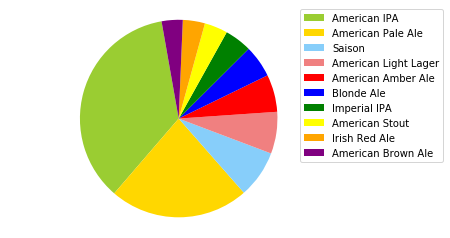

In [223]:
#pie chart--top 10 beer styles

labels = [r'American IPA', r'American Pale Ale', r'Saison', r'American Light Lager', r'American Amber Ale', r'Blonde Ale',
         r'Imperial IPA', r'American Stout', r'Irish Red Ale', r'American Brown Ale']
sizes = [16.16, 10.26, 3.5, 3.08, 2.75, 2.37, 2.0, 1.71, 1.63, 1.55]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'blue', 'green', 'yellow', 'orange', 'purple']
patches, texts = plt.pie(sizes, colors=colors, startangle=100)
plt.legend(patches, labels, bbox_to_anchor=(0.85,1.025), loc="upper left")

plt.axis('equal')
plt.show()

These are pretty specific names. It is probably best to categorize the types of beers into broader terms, for the whole data set, and then see what the breakdown is.

In [224]:
broad_styles = ['Ale', 'IPA', 'Pale Ale', 'Lager', 'Stout', 'Bitter', 'Cider', 'Porter']
recipe['BroadStyle'] = 'Other'
recipe['Style'].fillna('Unknown', inplace=True)
for broad_style in broad_styles:
    recipe.loc[recipe['Style'].str.contains(broad_style), 'BroadStyle'] = broad_style
    
style_popularity_as_perc = 100 * recipe['BroadStyle'].value_counts() / len(recipe)
style_popularity_as_perc.drop('Other', inplace=True)
print(style_popularity_as_perc)

IPA         23.102855
Ale         14.423038
Pale Ale    11.110058
Stout        8.061088
Lager        5.564506
Porter       3.655515
Bitter       3.359012
Cider        0.258594
Name: BroadStyle, dtype: float64


Next, we should look at possibly predicting what alchol percentage beers home brewers are looking to brew the most, based on the recipe data at hand. We can then correlate that number to the style of beers that consistently have that particular alchol percentage. 

In [225]:
#calculate the percentage of beers stronger that certain ABV %'s
strengths = [1, 5, 10, 15, 20]
for abv in strengths:
    print('{} ({:.2f})%\tBeers stronger than {} ABV'.format(sum(recipe['ABV'] > abv), 100 * sum(recipe['ABV'] > abv) / len(recipe), abv))

73696 (99.78)%	Beers stronger than 1 ABV
57351 (77.65)%	Beers stronger than 5 ABV
2385 (3.23)%	Beers stronger than 10 ABV
195 (0.26)%	Beers stronger than 15 ABV
54 (0.07)%	Beers stronger than 20 ABV


Now let's look at what these broad styles have in them, as far as ABV goes. Some consumers may go for higher ABV %'s, but only like beers that are either lighter or darker in color and/or body. 

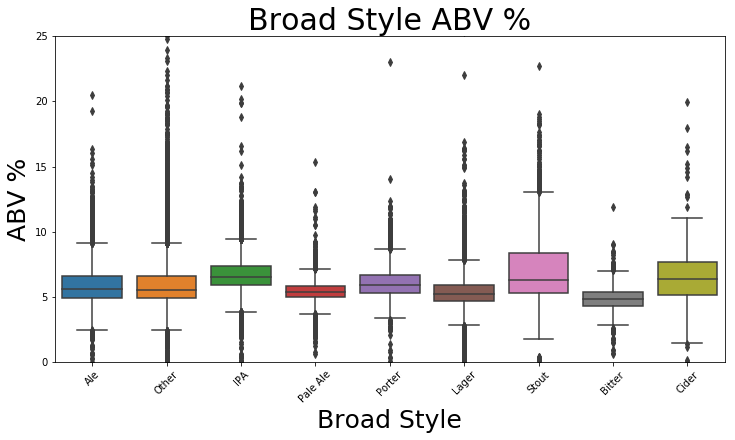

In [226]:
general_styles = ['Ale', 'IPA', 'Pale Ale', 'Lager', 'Stout', 'Bitter', 'Cider', 'Porter']
general_styles_dict = {'Brown':'Red','Fruit':'Spice', 'Stout':'Porter'}

df_general_styles = recipe.copy()
df_general_styles['Style_aux'] = 'Other'
for style in general_styles:
    df_general_styles.loc[df_general_styles['Style'].str.contains(style), 'Style_aux'] = style

plt.figure(figsize=(12,6))
sns.boxplot(df_general_styles['Style_aux'], df_general_styles['ABV'])
plt.xticks(rotation=45)
plt.ylim(0,25)
plt.title('Broad Style ABV %', fontsize=30)
plt.xlabel('Broad Style', fontsize=25)
plt.ylabel('ABV %', fontsize=25)
plt.show()

Let's do the same model for IBU's, or "International Bitterness Units"

In [227]:
#calculate the percentage of beers stronger that certain IBU's
bitterness = [25, 50, 75, 100, 200]
for ibu in bitterness:
    print('{} ({:.2f})%\tBeers stronger than {} IBU'.format(sum(recipe['IBU'] > ibu), 100 * sum(recipe['IBU'] > ibu) / len(recipe), ibu))

52877 (71.59)%	Beers stronger than 25 IBU
22334 (30.24)%	Beers stronger than 50 IBU
9599 (13.00)%	Beers stronger than 75 IBU
4235 (5.73)%	Beers stronger than 100 IBU
504 (0.68)%	Beers stronger than 200 IBU


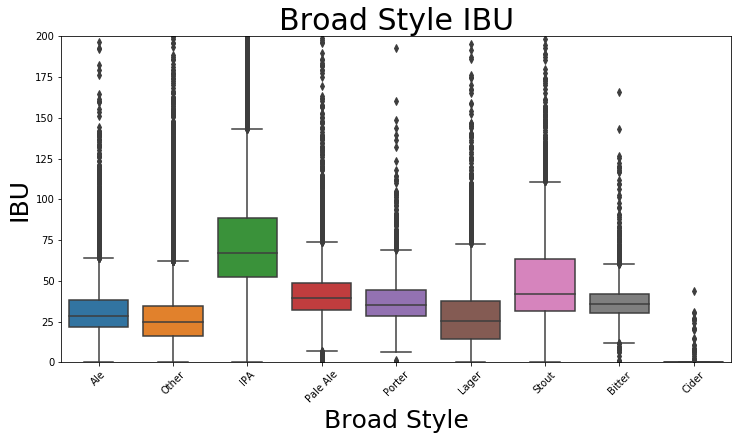

In [228]:
general_styles = ['Ale', 'IPA', 'Pale Ale', 'Lager', 'Stout', 'Bitter', 'Cider', 'Porter']
#general_styles_dict = {'Brown':'Red','Fruit':'Spice', 'Stout':'Porter'}

df_general_styles = recipe.copy()
df_general_styles['Style_aux'] = 'Other'
for style in general_styles:
    df_general_styles.loc[df_general_styles['Style'].str.contains(style), 'Style_aux'] = style

plt.figure(figsize=(12,6))
sns.boxplot(df_general_styles['Style_aux'], df_general_styles['IBU'])
plt.xticks(rotation=45)
plt.ylim(0,200)
plt.title('Broad Style IBU', fontsize=30)
plt.xlabel('Broad Style', fontsize=25)
plt.ylabel('IBU', fontsize=25)
plt.show()

In [229]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Let's try making a linear regression model out of this. We need two numerical columns to do so. Since we used ABV and IBU's before, we can compare the two and see if there is a correlation. The idea of this is to see if certain alchohol volumes coupled with a certain IBU level is a telling sign that consumers demand one specific type of beer over another. So the higher the volume in one concentrated area should be a key indicator. 

In [230]:
X = recipe.ABV.values.reshape(-1, 1)
y = recipe.IBU.values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)
X

Shape:  (73861, 1) (73861, 1)


array([[ 5.48],
       [ 8.16],
       [ 5.91],
       ..., 
       [ 5.01],
       [ 4.82],
       [ 6.55]])

(0, 200)

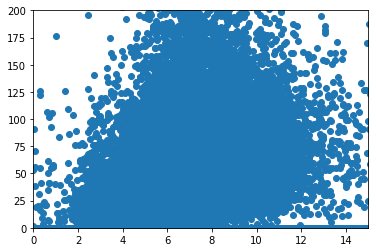

In [232]:
#resized this scatter plot. There are plenty of other entries with higher IBU's abnd ABV's, but this corridor is where the concentration lies. 
plt.scatter(X, y)
plt.xlim(0, 15)
plt.ylim(0, 200)

In [233]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[ 6.63248598]]
y-axis intercept:  [ 3.57351475]


In [234]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[ 0.]]
Max X Value: [[ 54.72]]


(0, 200)

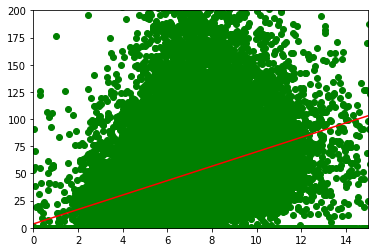

In [235]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='green')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlim(0, 15)
plt.ylim(0, 200)

For the most part here, the majority of beers in this list are between 5-10% in ABV and contain various amounts of IBU's spanning form 0-200, for what was limited on this graph. Off cuff, this does not seem like a good model to use in deciding consumer preference, but still gives us a good visual representation of the target area home brewers like. 

In [236]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate some data
X, y = make_regression(n_samples=75000, n_features=1, random_state=0, noise=4, bias=100.0)

# Create a linear model
model = LinearRegression()

# Fit (Train) our model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [237]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 16.08122923374772
R-squared (R2 ): 0.36491931963768354


OK, not a good indicator, probably since there are many different styles that can have high ABV and/or IBU. This does not help the store in deciding what to specifically stock their shelves with. We can include the other variables to at least find out what column labels are of higher importance. Random forest perhaps?  

In [238]:
from sklearn.preprocessing import LabelEncoder, Imputer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.37106416548568688

In order to do this, we will reclassify X and y variables to take into account the other columns.

In [240]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

X = recipe[['Size(L)','OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency']]
y = recipe['StyleID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

RFC = RandomForestClassifier(n_estimators = 100)
RFC.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [241]:
y_pred = RFC.predict(X_test)

In [242]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.30      0.09      0.14        32
          2       0.00      0.00      0.00        15
          3       0.00      0.00      0.00         5
          4       0.26      0.38      0.31       665
          5       0.41      0.45      0.43       110
          6       0.24      0.39      0.30       376
          7       0.54      0.75      0.63      3892
          8       0.21      0.07      0.11        69
          9       0.24      0.18      0.20       787
         10       0.40      0.60      0.48      2487
         11       0.14      0.12      0.13       264
         12       0.26      0.39      0.31       437
         13       0.14      0.05      0.08        77
         14       0.10      0.05      0.07       187
         15       0.05      0.02      0.02       192
         16       0.00      0.00      0.00         2
         17       0.00      0.00      0.00        16
         18       0.00      0.00      0.00   

/Users/mattbenner/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mattbenner/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [243]:
from sklearn.metrics import classification_report,confusion_matrix
pd.DataFrame({'Importance':RFC.feature_importances_},index=X.columns)

,Importance
Size(L),0.091338
OG,0.097144
FG,0.080682
ABV,0.145555
IBU,0.186382
Color,0.186768
BoilSize,0.101824
BoilTime,0.030129
Efficiency,0.080178


Though the regression model fell through, this random forest classification report and importance indicator does help us. It should help the store run a marketing survey initiative to gather information on home brewer interest based on top results here. Those were ABV, IBU, and color. Once they do that, they can compare that info to the data in the dataframe. 

I think with information from the consumer directly via survey, we, as a data science team could elaborate on this decision model to fine tune the result of the linear regression as well as the random forest framework. For now, we are basing our analysis on recipe data and the count of certain brew types. 